## Democratic Primary Poll Analysis

*This notebook includes data that was previously scraped & cleaned and then edited in Excel to (1) remove duplicate poll records & (2) include columns w/ polling method classifications

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import altair_latimes as lat

In [2]:
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

In [3]:
# File contains polling method data (manually entered via Excel); also, duplicate polls were removed
file = pd.read_csv('scraped_polls_duplicates_removed.csv')

In [4]:
len(file)

387

In [5]:
file.head(1)

,Dates,Region,Pollster,Sample,Voter_Type,Pollster_Grade,Biden,Sanders,Harris,Warren,...,Castro,Gabbard,Klobuchar,Steyer,Poll_End_Date,Cell,Landline,Text,Online,Mail
0,"Sep 17-20, 2019",National,HarrisX,761,LV,C+,32,15,5,20,...,1,1,1,1,9/20/2019,NaN,NaN,NaN,1,NaN


In [6]:
# Replacing 'Unclear' w/ 0.5 & NaN w/ 0 to enable arithmetic operations on column values
file = file.replace({'Unclear':0.5}).replace({np.nan:0}).reset_index(drop=True)

In [7]:
file.dtypes

Dates              object
Region             object
Pollster           object
Sample             object
Voter_Type         object
Pollster_Grade     object
Biden               int64
Sanders             int64
Harris              int64
Warren              int64
Buttigieg           int64
Booker              int64
Yang                int64
de Blasio           int64
Williamson          int64
O'Rourke            int64
Delaney             int64
Castro              int64
Gabbard             int64
Klobuchar           int64
Steyer              int64
Poll_End_Date      object
Cell               object
Landline           object
Text              float64
Online             object
Mail              float64
dtype: object

In [8]:
file[['Cell', 'Landline', 'Online']] = file[['Cell', 'Landline', 'Online']].astype(float)

In [9]:
file.head(1)

,Dates,Region,Pollster,Sample,Voter_Type,Pollster_Grade,Biden,Sanders,Harris,Warren,...,Castro,Gabbard,Klobuchar,Steyer,Poll_End_Date,Cell,Landline,Text,Online,Mail
0,"Sep 17-20, 2019",National,HarrisX,761,LV,C+,32,15,5,20,...,1,1,1,1,9/20/2019,0.0,0.0,0.0,1.0,0.0


In [10]:
file.to_csv('all_polls_final.csv', index=False)

---

### Pollster Methods
*In the dicts below I manually assigned each pollster to the method they used (thankfully, I didn't find any pollsters who used more than one method)

In [11]:
national_polls_dict = {
    'Cell/Landline': ['ABC News/Washington Post', 'Benenson Strategy Group*', 'Bold Blue Campaigns', 'CNN/SSRS', 'Fox News', 'GBAO', 'GQR Research', 
                        'IBD/TIPP', 'Monmouth University', 'NBC News/Wall Street Journal', 'Quinnipiac University', 'Suffolk University', 'TargetPoint/GQR Research'],
    'Landline/Online': ['Emerson College'],
    'Cell/Online': ['Public Policy Polling*'],
    'Online': ['Avalanche Strategy', 'Change Research', 'Claster Consulting', 
               'D-CYFOR', 'Echelon Insights', 'Harris Interactive', 'HarrisX', 'Ipsos', 'McLaughlin & Associates', 
               'Morning Consult', 'Pew Research Center', 'SurveyMonkey', 'SurveyUSA', 'YouGov', 'YouGov Blue/Data for Progress', 
               'Zogby Interactive/JZ Analytics'],
    'Mail': ['USC Dornsife/LA Times', 'WPA Intelligence*']
}

In [12]:
state_polls_dict = {
    'Landline': ['St. Pete Polls'],
    'Landline/Online': ['Emerson College', 'Florida Atlantic University'], 
    'Cell/Landline': ['Bendixen & Amandi International', 'David Binder Research',  'Denno Research', 'Fox News', 'Marquette Law School', 'Monmouth University',
                        'Muhlenberg College', 'Public Policy Institute of California', 'Quinnipiac University', 'Ragnar Research Partners', 
                        'Remington Research Group', 'RKM Research and Communications Inc.', 'Saint Anselm College', 'Selzer & Co.', 'Siena College', 
                        'SoonerPoll.com', 'Suffolk University', 'Tel Opinion Research', 'University of New Hampshire', 'Victory Research'], 
    'Landline/Text': ['Chism Strategies'],
    'Cell/Land/Text': ['Firehouse Strategies/Øptimus'],
    'Cell/Land/Online': ['Gravis Marketing'],
    'Cell/Online': ['Public Policy Polling*', 'Texas Lyceum'], 
    'Online': ['Capitol Weekly', 'Change Research', 'Civiqs', 'Climate Nexus', 'Crantford Research', 'HarrisX', 'SurveyMonkey', 'SurveyUSA', 'UC Berkeley', 'University of Texas at Tyler', 'YouGov', 
               'Zogby Interactive/JZ Analytics'],
    'Mail': ['Franklin & Marshall College', 'Hampton University', 'Univision/University of Houston/Latino Decisions/North Star Opinion Research', 'We Ask America']
} 

---

#### Confirming that no polls are missing:

In [13]:
pollsters_list = []
for polls_dict in [national_polls_dict, state_polls_dict]:
    for key in polls_dict:
        for val in polls_dict[key]:
            pollsters_list.append(val)
print(len(set(pollsters_list)))

65


In [14]:
for pollster in file.Pollster.unique():
    if pollster not in set(pollsters_list):
        print(pollster)

In [15]:
len(file.Pollster.unique())

65

---

#### Linking pollster to method (from dicts above)

State:

In [16]:
pollster_list = []
type_list = []

for key in state_polls_dict:
    for val in state_polls_dict[key]:
        pollster_list.append(val)
    type_list.extend(np.full(len(state_polls_dict[key]), key))

In [17]:
state_df = pd.DataFrame({'Pollster':pollster_list, 'Method':type_list})
state_df.head(1)

,Pollster,Method
0,St. Pete Polls,Landline


National:

In [18]:
pollster_list = []
type_list = []

for key in national_polls_dict:
    for val in national_polls_dict[key]:
        pollster_list.append(val)
    type_list.extend(np.full(len(national_polls_dict[key]), key))

In [19]:
national_df = pd.DataFrame({'Pollster':pollster_list, 'Method':type_list})
national_df.head(1)

,Pollster,Method
0,ABC News/Washington Post,Cell/Landline


In [20]:
combined = pd.concat([state_df, national_df]).drop_duplicates().reset_index(drop=True)

In [21]:
combined.head()

,Pollster,Method
0,St. Pete Polls,Landline
1,Emerson College,Landline/Online
2,Florida Atlantic University,Landline/Online
3,Bendixen & Amandi International,Cell/Landline
4,David Binder Research,Cell/Landline


In [22]:
len(combined)

65

In [23]:
len(file.Pollster.unique())

65

---

#### Pollsters w/ Partially Missing Data:

In [24]:
for pollster in file.Pollster.unique():
    df = file.loc[:, 'Cell':'Mail'][file.Pollster == pollster]
    row_values = [list(x) for x in df.values]  # List of lists containing row values
    values = []
    for lst in row_values:
        values += lst
    if .5 in set(values) and len(set(values)) > 2:
        print(pollster, set(values))

Suffolk University {0.5, 0.0, 877.0, 178.0, 822.0, 123.0}
Tel Opinion Research {288.0, 0.0, 0.5, 200.0, 400.0, 464.0, 336.0, 312.0}


*These are the only two pollsters for whom I have partially missing data (need to exclude .5 from the avgs below) 

---

#### Calculating % of Data Collected Via a Method (for each record in 'file'):

In [25]:
# Calculating percentage of poll data collected via each method (for individual polls)
cell_vals = []
landline_vals = []
text_vals = []
online_vals = []
mail_vals = []

for i, row in file.iterrows():
    cell = row.Cell
    landline = row.Landline
    text = row.Text
    online = row.Online
    mail = row.Mail
    group = [cell, landline, text, online, mail]
    total = sum(group)
    
    partially_missing = ['Suffolk University', 'Tel Opinion Research']  # Excluding placeholder values from being factored into avgs (below)
    counter = 0
    for lst in [cell_vals, landline_vals, text_vals, online_vals, mail_vals]:
        if row.Pollster in partially_missing and cell == .5:  
            lst.append('Unclear')  # Classifying as 'Unclear' to ignore these values from avg. (below)
        else:# i.e. actual cell/landline numbers were recorded
            lst.append(int(round(group[counter]/total * 100, 0)))
        counter += 1

In [26]:
file['Cell Percentage'] = cell_vals
file['Landline Percentage'] = landline_vals
file['Text Percentage'] = text_vals
file['Online Percentage'] = online_vals
file['Mail Percentage'] = mail_vals

#### Avg. % of Data Collected Via a Method (for each pollster in 'combined'):

In [27]:
# Calculating avg. percentage of poll data collected via each method (for each pollster)
cell_vals = []
landline_vals = []
text_vals = []
online_vals = []
mail_vals = []
partials = file.Pollster.isin(['Suffolk University', 'Tel Opinion Research'])
unclear = file['Cell Percentage'] == 'Unclear'
partials_removed_df = file[~(partials & unclear)]

for pollster in combined.Pollster.unique():
    df = partials_removed_df[partials_removed_df.Pollster == pollster]

    cell = df['Cell Percentage'].mean()
    landline = df['Landline Percentage'].mean()
    text = df['Text Percentage'].mean()
    online = df['Online Percentage'].mean()
    mail = df['Mail Percentage'].mean()
    group = [cell, landline, text, online, mail]
    lists = [cell_vals, landline_vals, text_vals, online_vals, mail_vals]
    counter = 0
    
    # Gravis Marketing
    if group[:4] == [50, 50, 0, 50]:  
        vals = [-1, -1, 0, -1, 0]
        for lst in lists:
            lst.append(vals[counter])
            counter += 1
    # Rows w/ unknown ratio of cell/landline calls 
    elif group[:2] == [50, 50]:  
        vals = [-1, -1, 0, 0, 0]        
        for lst in lists:
            lst.append(vals[counter])
            counter += 1
    else:
        for lst in lists:
            lst.append(int(round(group[counter], 0)))
            counter += 1

In [28]:
combined['Cell Percentage'] = cell_vals
combined['Landline Percentage'] = landline_vals
combined['Text Percentage'] = text_vals
combined['Online Percentage'] = online_vals
combined['Mail Percentage'] = mail_vals

In [29]:
combined = combined.replace({-1:50}).sort_values(['Method', 'Landline Percentage'], ascending=[True, False]).reset_index(drop=True)

In [30]:
# Including pollsters who weren't explicitly listed in FiveThirtyEight's collection but jointly conducted polls w/ the following pollsters
combined.Pollster = combined.Pollster.replace({'Ipsos':'CNN/Ipsos', 'Selzer & Co.':'CNN/Des Moines Register (Selzer & Co.)', 
                                           'Suffolk University':'Suffolk University/USA Today', 'Ipsos':'Reuters/Ipsos'})

In [31]:
combined = combined.sort_values('Pollster').rename({'Cell Percentage':'Cell', 'Landline Percentage':'Landline',
                                                    'Text Percentage':'Text', 'Online Percentage':'Online',
                                                    'Mail Percentage':'Mail'}, axis=1)

In [32]:
combined.head()

,Pollster,Method,Cell,Landline,Text,Online,Mail
24,ABC News/Washington Post,Cell/Landline,65,35,0,0,0
55,Avalanche Strategy,Online,0,0,0,100,0
6,Bendixen & Amandi International,Cell/Landline,50,50,0,0,0
12,Benenson Strategy Group*,Cell/Landline,50,50,0,0,0
13,Bold Blue Campaigns,Cell/Landline,50,50,0,0,0


In [33]:
# For plotting data in DataWrapper
combined.to_csv('pollster_methods.csv', index=False)

---

#### Plotting Data via Altair

In [34]:
alt_chart = pd.DataFrame()

for col in ['Landline', 'Cell', 'Text', 'Online', 'Mail']:
    df = combined.loc[:, 'Pollster':'Mail']
    df['Percent'] = combined[col]
    df['Type'] = np.full(len(df), col)
    alt_chart = pd.concat([alt_chart, df])

In [35]:
alt_chart.loc[:,'Cell':'Mail'] = alt_chart.loc[:,'Cell':'Mail'].astype(str) + '%'

In [36]:
alt_chart.head()

,Pollster,Method,Cell,Landline,Text,Online,Mail,Percent,Type
24,ABC News/Washington Post,Cell/Landline,65%,35%,0%,0%,0%,35,Landline
55,Avalanche Strategy,Online,0%,0%,0%,100%,0%,0,Landline
6,Bendixen & Amandi International,Cell/Landline,50%,50%,0%,0%,0%,50,Landline
12,Benenson Strategy Group*,Cell/Landline,50%,50%,0%,0%,0%,50,Landline
13,Bold Blue Campaigns,Cell/Landline,50%,50%,0%,0%,0%,50,Landline


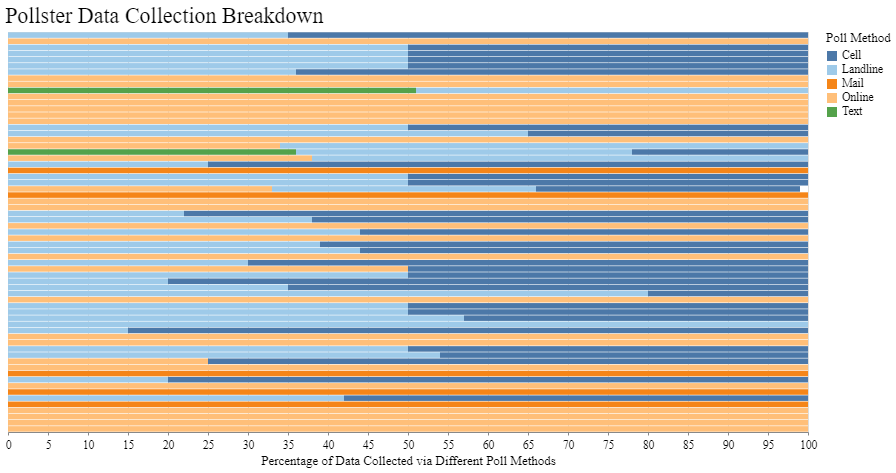

In [37]:
# Y-axis containing pollster names were removed to focus attention on the relative frequency of each method (indicated by bar color)
poll_methods = alt.Chart(alt_chart, title='Pollster Data Collection Breakdown').mark_bar().encode(
x=alt.X('sum(Percent)', title='Percentage of Data Collected via Different Poll Methods'),
y=alt.Y('Pollster', axis=None),
color=alt.Color('Type', title='Poll Method', scale=alt.Scale(scheme='tableau20')),
tooltip=['Pollster', 'Cell', 'Landline', 'Text', 'Online', 'Mail']).properties(background='white', height=400)
poll_methods

---

## Polling Method Counts

### National:

In [38]:
poll_types = []
poll_counts = []
for key in national_polls_dict:
    poll_types.append(key)
    poll_counts.append(len(national_polls_dict[key]))

In [39]:
nat_polls_df = pd.DataFrame({'Poll Type':poll_types, 'Poll Count':poll_counts})

In [40]:
nat_polls_df = nat_polls_df.sort_values('Poll Count', ascending=False)

In [41]:
nat_polls_df

,Poll Type,Poll Count
3,Online,16
0,Cell/Landline,13
4,Mail,2
1,Landline/Online,1
2,Cell/Online,1


In [42]:
types = list(nat_polls_df['Poll Type'].values)

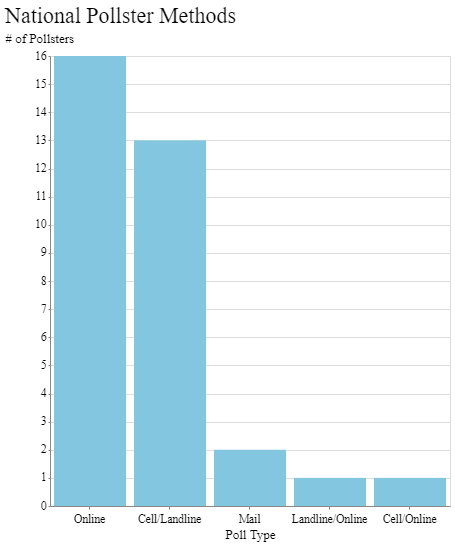

In [43]:
alt.Chart(nat_polls_df, title='National Pollster Methods').mark_bar().encode(
    x=alt.X('Poll Type', sort=types),
    y=alt.Y('Poll Count', title='# of Pollsters')).properties(background='white', width=400)

---

### State:

In [44]:
poll_types = []
poll_counts = []
for key in state_polls_dict:
    poll_types.append(key)
    poll_counts.append(len(state_polls_dict[key]))

In [45]:
state_polls_df = pd.DataFrame({'Poll Type':poll_types, 'Poll Count':poll_counts})

In [46]:
state_polls_df = state_polls_df.sort_values('Poll Count', ascending=False)

In [47]:
state_polls_df

,Poll Type,Poll Count
2,Cell/Landline,20
7,Online,12
8,Mail,4
1,Landline/Online,2
6,Cell/Online,2
0,Landline,1
3,Landline/Text,1
4,Cell/Land/Text,1
5,Cell/Land/Online,1


In [48]:
types = list(state_polls_df['Poll Type'].values)

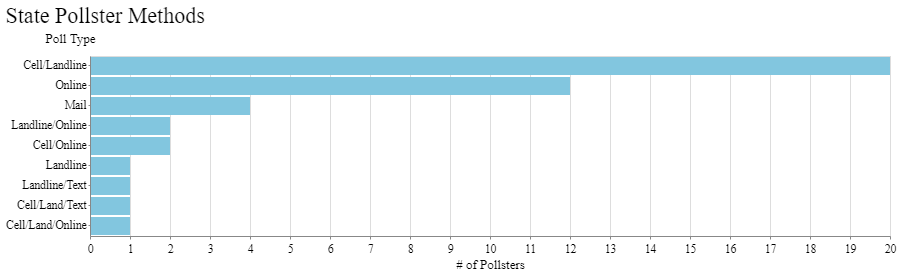

In [49]:
alt.Chart(state_polls_df, title='State Pollster Methods').mark_bar().encode(
    x=alt.X('Poll Count', title='# of Pollsters'),
    y=alt.Y('Poll Type', sort=types)).properties(background='white')

---

### Findings:
- Online is the most utilized method for national polls
- Cell/Landline is the most utilized method for state polls

---